In [1]:
from datetime import date

import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter

# Пройдемся по всем годам и посмотрим на динамику в первые 3 месяца

## Обзор 2013 года

In [ ]:
df13 = pd.read_csv("data/2013/Divvy_Trips_2013.csv")

In [90]:
df13["starttime"] = df13.apply(
    lambda x: date(
        int(x["starttime"].strip("nan").split("-")[0]),
        int(x["starttime"].strip("nan").split("-")[1]),
        int(x["starttime"].strip("nan").split("-")[2][:3]),
    ),
    axis=1,
)

In [86]:
df13 = df13[df13["starttime"] < date(2013, 4, 1)]

In [87]:
df13 = df13.groupby(["starttime"])["tripduration"].sum()
df13 = df13.to_frame()
df13.reset_index(inplace=True)

In [88]:
df13.head()

,starttime,tripduration


### 2013 не рассматриваем - данные есть только с 6-го месяца 2013 года

## Обзор 2014 года

In [2]:
df = pd.read_csv("data/2014/Divvy_Trips_2014_full.csv.gz", compression="gzip")

In [3]:
df = df[(df["birthyear"] > 1930) & (df["birthyear"] < 2018)]

In [4]:
df["starttime"] = pd.to_datetime(df["starttime"]).dt.date

In [5]:
df = df[df["starttime"] < date(2014, 4, 1)]

In [6]:
df.head()

,trip_id,starttime,stoptime,bikeid,tripduration,from_station_id,from_station_name,to_station_id,to_station_name,usertype,gender,birthyear
783230,1319969,2014-03-31,3/31/2014 23:57,2333,140,240,Sheridan Rd & Irving Park Rd,254,Pine Grove Ave & Irving Park Rd,Subscriber,Male,1984.0
783231,1319967,2014-03-31,3/31/2014 23:57,1607,189,240,Sheridan Rd & Irving Park Rd,254,Pine Grove Ave & Irving Park Rd,Subscriber,Male,1985.0
783232,1319963,2014-03-31,4/1/2014 0:11,1882,1131,261,Hermitage Ave & Polk St,305,Western Ave & Division St,Subscriber,Female,1970.0
783234,1319957,2014-03-31,4/1/2014 0:00,2548,665,174,Canal St & Madison St,99,Lake Shore Dr & Ohio St,Subscriber,Male,1981.0
783239,1319951,2014-03-31,3/31/2014 23:49,2276,322,306,Sheridan Rd & Buena Ave,114,Sheffield Ave & Addison St,Subscriber,Male,1987.0


In [7]:
df = df.groupby(["starttime"])["tripduration"].sum()

In [8]:
df = df.to_frame()

In [9]:
df.reset_index(inplace=True)

In [10]:
# Получаем время в часах и сглаживаем график
df["tripduration"] = savgol_filter(
    df["tripduration"], window_length=15, polyorder=3
)
df["tripduration"] = df["tripduration"].div(3600)

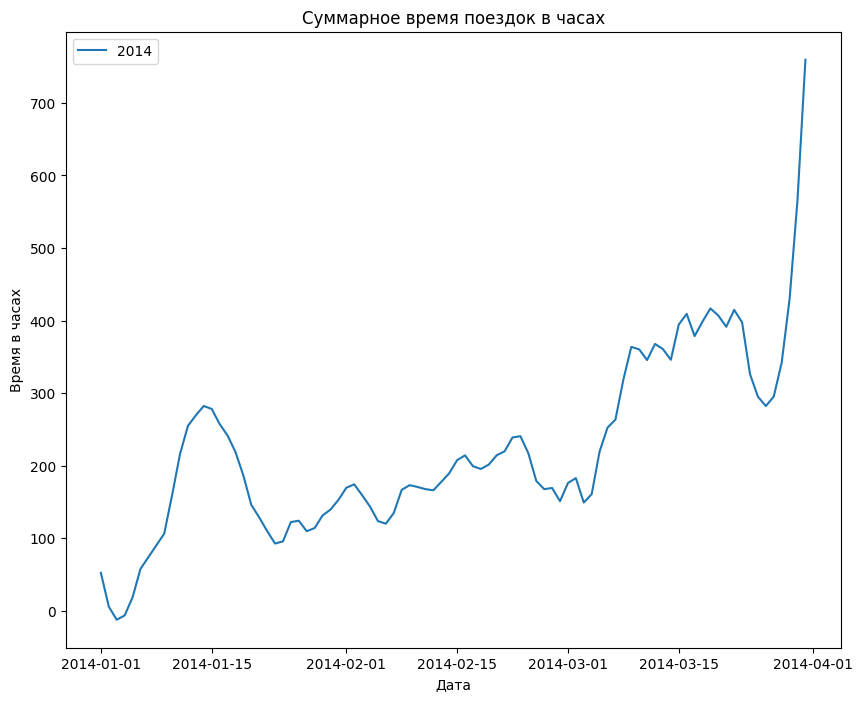

In [11]:
fig, ax = plt.subplots(figsize=(10, 8))  # устанавливаем размер графика
df.plot(x="starttime", y="tripduration", kind="line", ax=ax, label="2014")
ax.set_xlabel("Дата")  # устанавливаем имя оси x
ax.set_ylabel("Время в часах")  # устанавливаем имя оси y
ax.set_title("Суммарное время поездок в часах")  # устанавливаем заголовок графика
plt.show()

## Обзор 2015 года

In [36]:
df15 = pd.read_csv("data/2015/Divvy_Trips_2015_full.csv.gz", compression="gzip")

In [37]:
df15 = df15[(df15["birthyear"] > 1930) & (df15["birthyear"] < 2018)]

In [39]:
df15["starttime"] = pd.to_datetime(df15["starttime"]).dt.date

In [40]:
df15 = df15[df15["starttime"] < date(2015, 4, 1)]

In [41]:
df15 = df15.groupby(["starttime"])["tripduration"].sum()
df15 = df15.to_frame()
df15.reset_index(inplace=True)

In [45]:
df15["tripduration"] = savgol_filter(
    df15["tripduration"], window_length=15, polyorder=3
)
df15["tripduration"] = df15["tripduration"].div(3600)

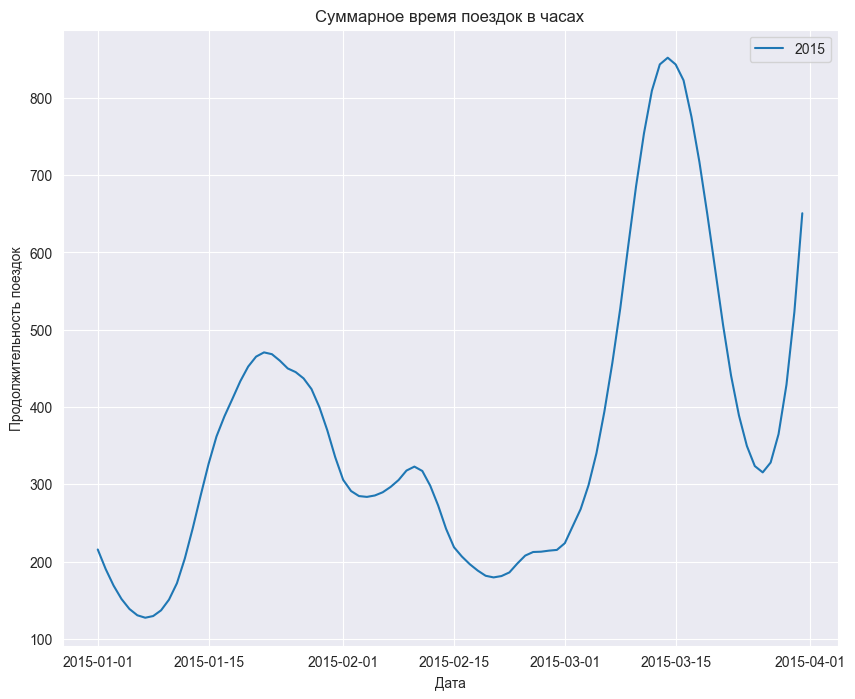

In [47]:
fig, ax = plt.subplots(figsize=(10, 8))  # устанавливаем размер графика
df15.plot(x="starttime", y="tripduration", kind="line", ax=ax, label="2015")
ax.set_xlabel("Дата")  # устанавливаем имя оси x
ax.set_ylabel("Продолжительность поездок")  # устанавливаем имя оси y
ax.set_title("Суммарное время поездок в часах")  # устанавливаем заголовок графика
plt.show()

In [18]:
df15["tripduration"].mean()

1312231.3333333333

## Обзор 2016 года

In [56]:
df16 = pd.read_csv("data/2016/Divvy_Trips_2016_full.csv.gz", compression="gzip")
df16 = df16[(df16["birthyear"] > 1930) & (df16["birthyear"] < 2018)]
df16["starttime"] = df16.apply(
    lambda x: date(
        int(x["starttime"].split("/")[2][:4]),
        int(x["starttime"].split("/")[0]),
        int(x["starttime"].split("/")[1]),
    ),
    axis=1,
)
df16 = df16[df16["starttime"] < date(2016, 4, 1)]
df16 = df16.groupby(["starttime"])["tripduration"].sum()
df16 = df16.to_frame()
df16.reset_index(inplace=True)

In [57]:
df16

,starttime,tripduration
0,2016-01-01,607095
1,2016-01-02,809078
2,2016-01-03,816878
3,2016-01-04,2531601
4,2016-01-05,2516695
...,...,...
86,2016-03-27,2303199
87,2016-03-28,4042518
88,2016-03-29,5396464
89,2016-03-30,3998830


In [58]:
df16["tripduration"] = savgol_filter(
    df16["tripduration"], window_length=15, polyorder=3
)
df16["tripduration"] = df16["tripduration"].div(3600)

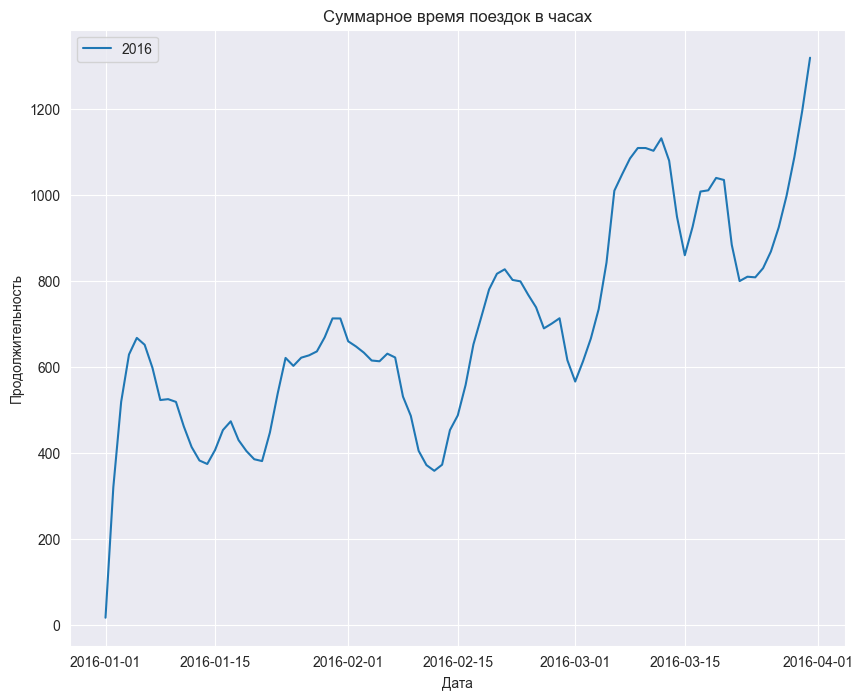

In [59]:
fig, ax = plt.subplots(figsize=(10, 8))  # устанавливаем размер графика
df16.plot(x="starttime", y="tripduration", kind="line", ax=ax, label="2016")
ax.set_xlabel("Дата")  # устанавливаем имя оси x
ax.set_ylabel("Продолжительность")  # устанавливаем имя оси y
ax.set_title("Суммарное время поездок в часах")  # устанавливаем заголовок графика
plt.show()

## Обзор 2017 года

In [12]:
df17 = pd.read_csv("data/2017/Divvy_Trips_2017_full.csv.gz", compression="gzip")

In [13]:
df17 = df17[(df17["birthyear"] > 1930) & (df17["birthyear"] < 2018)]
df17["start_time"] = df17.apply(
    lambda x: date(
        int(x["start_time"].split("/")[2][:4]),
        int(x["start_time"].split("/")[0]),
        int(x["start_time"].split("/")[1]),
    ),
    axis=1,
)
df17 = df17[df17["start_time"] < date(2017, 4, 1)]
df17 = df17.groupby(["start_time"])["tripduration"].sum()
df17 = df17.to_frame()
df17.reset_index(inplace=True)

In [14]:
df17["tripduration"] = savgol_filter(
    df17["tripduration"], window_length=15, polyorder=3
)
df17["tripduration"] = df17["tripduration"].div(3600)

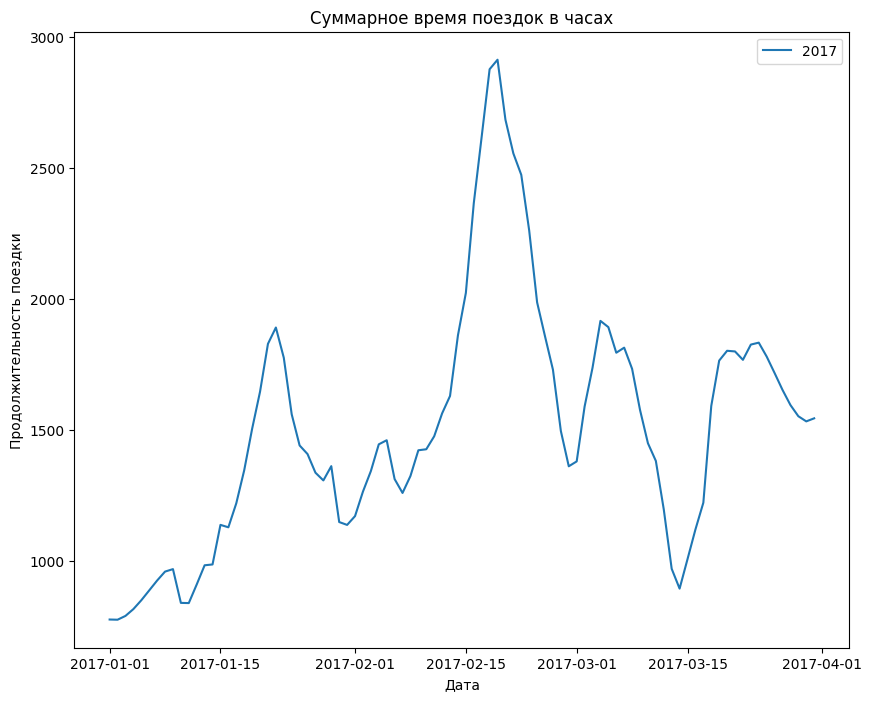

In [15]:
fig, ax = plt.subplots(figsize=(10, 8))  # устанавливаем размер графика
df17.plot(x="start_time", y="tripduration", kind="line", ax=ax, label="2017")
ax.set_xlabel("Дата")  # устанавливаем имя оси x
ax.set_ylabel("Продолжительность поездки")  # устанавливаем имя оси y
ax.set_title("Суммарное время поездок в часах")  # устанавливаем заголовок графика
plt.show()

## Обзор 2018 года
### Обработка датасета

In [72]:
df18 = pd.read_csv("data/2018/Divvy_Trips_2018_full.csv.gz", compression="gzip")

C:\Users\fpokr\AppData\Local\Temp\ipykernel_13032\186791025.py:1: DtypeWarning: Columns (1,2,4,6,8,9,10,13,14,18,20,21,22) have mixed types. Specify dtype option on import or set low_memory=False.
  df18 = pd.read_csv("data/2018/Divvy_Trips_2018_full.csv.gz", compression="gzip")


In [73]:
df18 = df18[
    [
        "01 - Rental Details Local Start Time",
        "01 - Rental Details Duration In Seconds Uncapped",
        "start_time",
        "tripduration",
    ]
]

In [74]:
df18["starttime"] = df18["start_time"].astype(str) + df18[
    "01 - Rental Details Local Start Time"
].astype(str)

In [75]:
df18["starttime"] = df18.apply(
    lambda x: date(
        int(x["starttime"].strip("nan").split("/")[2][:4]),
        int(x["starttime"].strip("nan").split("/")[0]),
        int(x["starttime"].strip("nan").split("/")[1]),
    )
    if "/" in x["starttime"].strip("nan")
    else date(
        int(x["starttime"].strip("nan").split("-")[0]),
        int(x["starttime"].strip("nan").split("-")[1]),
        int(x["starttime"].strip("nan").split("-")[2][:3]),
    ),
    axis=1,
)

In [76]:
df18 = df18.drop(["01 - Rental Details Local Start Time", "start_time"], axis=1)

In [77]:
df18["trip_duration"] = df18["tripduration"].astype(str) + df18[
    "01 - Rental Details Duration In Seconds Uncapped"
].astype(str)

In [78]:
df18["trip_duration"] = df18.apply(
    lambda x: float(x["trip_duration"].strip("nan").replace(",", "")), axis=1
)

In [79]:
df18 = df18.drop(
    ["01 - Rental Details Duration In Seconds Uncapped", "tripduration"], axis=1
)

In [80]:
df18.columns = ["start_time", "tripduration"]

In [81]:
df18 = df18[
    (df18["start_time"] < date(2018, 4, 1)) & (df18["start_time"] > date(2017, 12, 31))
]

In [82]:
df18.head()

,start_time,tripduration
0,2018-01-01,323.0
1,2018-01-01,377.0
2,2018-01-01,2904.0
3,2018-01-01,747.0
4,2018-01-01,183.0


In [83]:
df18 = df18.groupby(["start_time"])["tripduration"].sum()
df18 = df18.to_frame()
df18.reset_index(inplace=True)

In [84]:
df18["tripduration"] = savgol_filter(
    df18["tripduration"], window_length=15, polyorder=3
)
df18["tripduration"] = df18["tripduration"].div(3600)

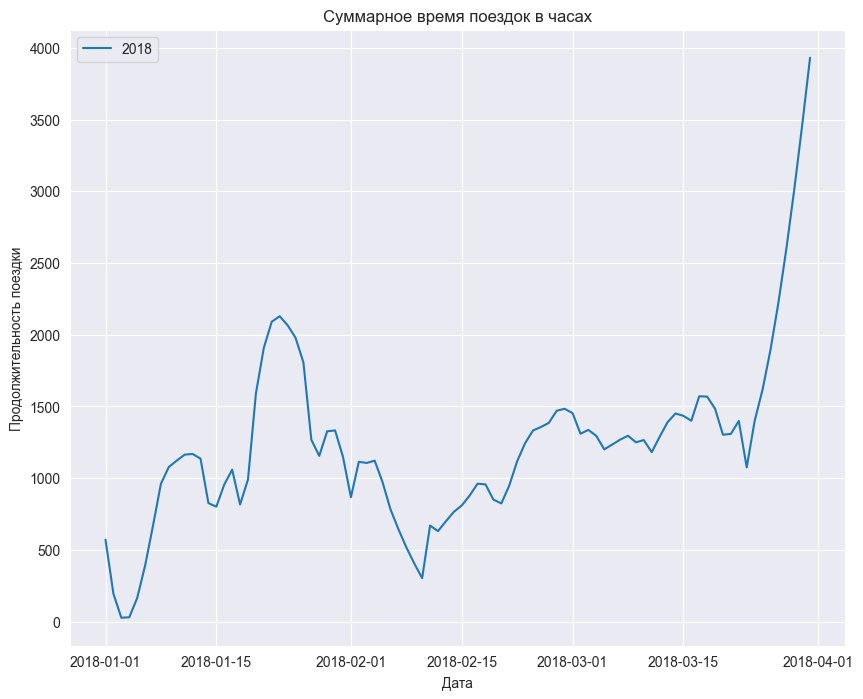

In [85]:
fig, ax = plt.subplots(figsize=(10, 8))  # устанавливаем размер графика
df18.plot(x="start_time", y="tripduration", kind="line", ax=ax, label="2018")
ax.set_xlabel("Дата")  # устанавливаем имя оси x
ax.set_ylabel("Продолжительность поездки")  # устанавливаем имя оси y
ax.set_title("Суммарное время поездок в часах")  # устанавливаем заголовок графика
plt.show()

## Обзор 2019 года

In [12]:
df19 = pd.read_csv("data/2019/Divvy_Trips_2019_full.csv.gz", compression="gzip")

C:\Users\fpokr\AppData\Local\Temp\ipykernel_13592\1740706105.py:1: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  df19 = pd.read_csv("data/2019/Divvy_Trips_2019_full.csv.gz", compression="gzip")


In [13]:
df19.head()

,trip_id,start_time,end_time,bikeid,tripduration,from_station_id,from_station_name,to_station_id,to_station_name,usertype,gender,birthyear
0,21742443,2019-01-01 00:04:37,2019-01-01 00:11:07,2167,390.0,199,Wabash Ave & Grand Ave,84,Milwaukee Ave & Grand Ave,Subscriber,Male,1989.0
1,21742444,2019-01-01 00:08:13,2019-01-01 00:15:34,4386,441.0,44,State St & Randolph St,624,Dearborn St & Van Buren St (*),Subscriber,Female,1990.0
2,21742445,2019-01-01 00:13:23,2019-01-01 00:27:12,1524,829.0,15,Racine Ave & 18th St,644,Western Ave & Fillmore St (*),Subscriber,Female,1994.0
3,21742446,2019-01-01 00:13:45,2019-01-01 00:43:28,252,"1,783.0",123,California Ave & Milwaukee Ave,176,Clark St & Elm St,Subscriber,Male,1993.0
4,21742447,2019-01-01 00:14:52,2019-01-01 00:20:56,1170,364.0,173,Mies van der Rohe Way & Chicago Ave,35,Streeter Dr & Grand Ave,Subscriber,Male,1994.0


In [14]:
df19 = df19[(df19["birthyear"] > 1930) & (df19["birthyear"] < 2018)]
df19["start_time"] = df19.apply(
    lambda x: date(
        int(x["start_time"].split("/")[2][:4]),
        int(x["start_time"].split("/")[0]),
        int(x["start_time"].split("/")[1]),
    )
    if "/" in x["start_time"]
    else date(
        int(x["start_time"].split("-")[0]),
        int(x["start_time"].split("-")[1]),
        int(x["start_time"].split("-")[2][:3]),
    ),
    axis=1,
)
df19 = df19[
    (df19["start_time"] < date(2019, 4, 1)) & (df19["start_time"] > date(2018, 12, 31))
]

In [15]:
df19["tripduration"] = df19.apply(
    lambda x: float(x["tripduration"].replace(",", "")), axis=1
)

In [16]:
df19 = df19.groupby(["start_time"])["tripduration"].sum()
df19 = df19.to_frame()
df19.reset_index(inplace=True)

In [17]:
df19.head()

,start_time,tripduration
0,2019-01-01,1005182.0
1,2019-01-02,2628622.0
2,2019-01-03,3735719.0
3,2019-01-04,5994142.0
4,2019-01-05,7025746.0


In [18]:
# Получаем время в часах и сглаживаем график
df19["tripduration"] = savgol_filter(
    df19["tripduration"], window_length=15, polyorder=3
)
df19["tripduration"] = df19["tripduration"].div(3600)

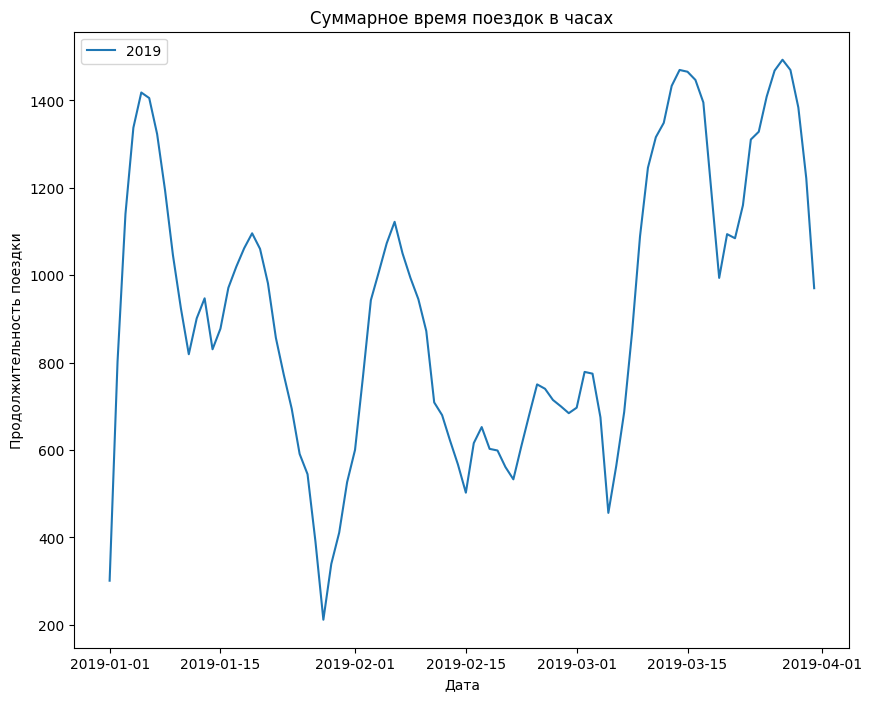

In [20]:
fig, ax = plt.subplots(figsize=(10, 8))  # устанавливаем размер графика
df19.plot(x="start_time", y="tripduration", kind="line", ax=ax, label="2019")
ax.set_xlabel("Дата")  # устанавливаем имя оси x
ax.set_ylabel("Продолжительность поездки")  # устанавливаем имя оси y
ax.set_title("Суммарное время поездок в часах")  # устанавливаем заголовок графика
plt.show()

## Обзор 2020 года

In [16]:
df20 = pd.read_csv("data/2020/Divvy_Trips_2020_full.csv.gz", compression="gzip")

C:\Users\fpokr\AppData\Local\Temp\ipykernel_7836\2176079408.py:1: DtypeWarning: Columns (5,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df20 = pd.read_csv("data/2020/Divvy_Trips_2020_full.csv.gz", compression="gzip")


In [17]:
df20.head(100)

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,EACB19130B0CDA4A,docked_bike,2020-01-21 20:06:59,2020-01-21 20:14:30,Western Ave & Leland Ave,239.0,Clark St & Leland Ave,326.0,41.9665,-87.6884,41.9671,-87.6674,member
1,8FED874C809DC021,docked_bike,2020-01-30 14:22:39,2020-01-30 14:26:22,Clark St & Montrose Ave,234.0,Southport Ave & Irving Park Rd,318.0,41.9616,-87.6660,41.9542,-87.6644,member
2,789F3C21E472CA96,docked_bike,2020-01-09 19:29:26,2020-01-09 19:32:17,Broadway & Belmont Ave,296.0,Wilton Ave & Belmont Ave,117.0,41.9401,-87.6455,41.9402,-87.6530,member
3,C9A388DAC6ABF313,docked_bike,2020-01-06 16:17:07,2020-01-06 16:25:56,Clark St & Randolph St,51.0,Fairbanks Ct & Grand Ave,24.0,41.8846,-87.6319,41.8918,-87.6206,member
4,943BC3CBECCFD662,docked_bike,2020-01-30 08:37:16,2020-01-30 08:42:48,Clinton St & Lake St,66.0,Wells St & Hubbard St,212.0,41.8856,-87.6418,41.8899,-87.6343,member
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,8AE216607599859B,docked_bike,2020-01-07 08:48:56,2020-01-07 08:54:47,Kosciuszko Park,499.0,Kedzie Ave & Milwaukee Ave,260.0,41.9306,-87.7238,41.9296,-87.7079,member
96,2B2663BB6275FCBC,docked_bike,2020-01-05 17:16:35,2020-01-05 17:23:41,Lincoln Ave & Belmont Ave,131.0,Sheffield Ave & Wrightwood Ave,302.0,41.9394,-87.6684,41.9287,-87.6538,member
97,F497A30987B4A7E4,docked_bike,2020-01-28 08:10:56,2020-01-28 08:47:58,Wilton Ave & Diversey Pkwy,13.0,Kingsbury St & Kinzie St,133.0,41.9324,-87.6527,41.8892,-87.6385,member
98,833F48F0CA8FA238,docked_bike,2020-01-02 13:14:56,2020-01-02 13:43:07,Larrabee St & Division St,359.0,Clark St & Grace St,165.0,41.9035,-87.6434,41.9508,-87.6592,member


In [18]:
df20["tripduration"] = pd.to_datetime(df20["ended_at"]) - pd.to_datetime(
    df20["started_at"]
)

In [19]:
df20["tripduration"] = df20["tripduration"].dt.total_seconds()

In [20]:
df20["started_at"] = df20.apply(
    lambda x: date(
        int(x["started_at"].split("-")[0]),
        int(x["started_at"].split("-")[1]),
        int(x["started_at"].split("-")[2][:3]),
    ),
    axis=1,
)

In [21]:
df20 = df20.groupby(["started_at"])["tripduration"].sum()
df20 = df20.to_frame()
df20.reset_index(inplace=True)

In [22]:
df20 = df20[
    (df20["started_at"] < date(2020, 4, 1)) & (df20["started_at"] > date(2019, 12, 31))
]

In [23]:
df20 = df20[df20["tripduration"] > 60]

In [24]:
df20["tripduration"] = savgol_filter(
    df20["tripduration"], window_length=15, polyorder=3
)
df20["tripduration"] = df20["tripduration"].div(3600)

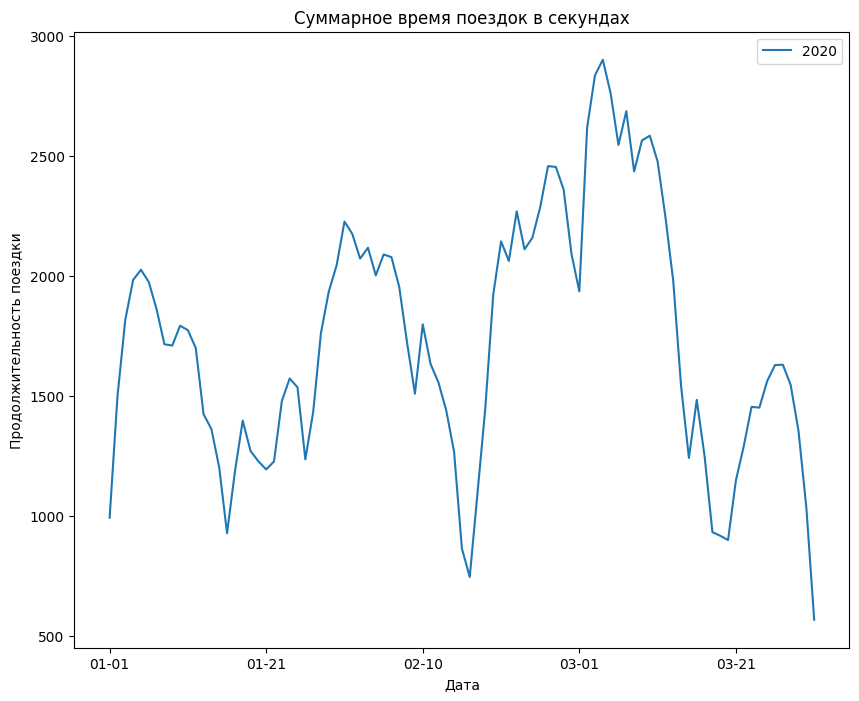

In [89]:
fig, ax = plt.subplots(figsize=(10, 8))  # устанавливаем размер графика
df20.plot(x="started_at", y="tripduration", kind="line", ax=ax, label="2020")
ax.set_xlabel("Дата")  # устанавливаем имя оси x
ax.set_ylabel("Продолжительность поездки")  # устанавливаем имя оси y
ax.set_title("Суммарное время поездок в секундах")  # устанавливаем заголовок графика
plt.show()

## Обзор 2021 года

In [36]:
df21 = pd.read_csv("data/2021/Divvy_Trips_2021_full.csv.gz", compression="gzip")

In [37]:
df21.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,E19E6F1B8D4C42ED,electric_bike,2021-01-23 16:14:19,2021-01-23 16:24:44,California Ave & Cortez St,17660,NaN,NaN,41.900341,-87.696743,41.89,-87.72,member
1,DC88F20C2C55F27F,electric_bike,2021-01-27 18:43:08,2021-01-27 18:47:12,California Ave & Cortez St,17660,NaN,NaN,41.900333,-87.696707,41.90,-87.69,member
2,EC45C94683FE3F27,electric_bike,2021-01-21 22:35:54,2021-01-21 22:37:14,California Ave & Cortez St,17660,NaN,NaN,41.900313,-87.696643,41.90,-87.70,member
3,4FA453A75AE377DB,electric_bike,2021-01-07 13:31:13,2021-01-07 13:42:55,California Ave & Cortez St,17660,NaN,NaN,41.900399,-87.696662,41.92,-87.69,member
4,BE5E8EB4E7263A0B,electric_bike,2021-01-23 02:24:02,2021-01-23 02:24:45,California Ave & Cortez St,17660,NaN,NaN,41.900326,-87.696697,41.90,-87.70,casual


In [38]:
df21["tripduration"] = pd.to_datetime(df21["ended_at"]) - pd.to_datetime(
    df21["started_at"]
)

In [39]:
df21["tripduration"] = df21["tripduration"].dt.total_seconds()

In [40]:
df21["started_at"] = df21.apply(
    lambda x: date(
        int(x["started_at"].split("-")[0]),
        int(x["started_at"].split("-")[1]),
        int(x["started_at"].split("-")[2][:3]),
    ),
    axis=1,
)

In [41]:
df21 = df21[df21["tripduration"] > 60]

In [42]:
df21 = df21[
    (df21["started_at"] < date(2021, 4, 1)) & (df21["started_at"] > date(2020, 12, 31))
]

In [43]:
df21 = df21.groupby(["started_at"])["tripduration"].sum()
df21 = df21.to_frame()
df21.reset_index(inplace=True)

In [44]:
df21["tripduration"] = savgol_filter(
    df21["tripduration"], window_length=15, polyorder=3
)
df21["tripduration"] = df21["tripduration"].div(3600)

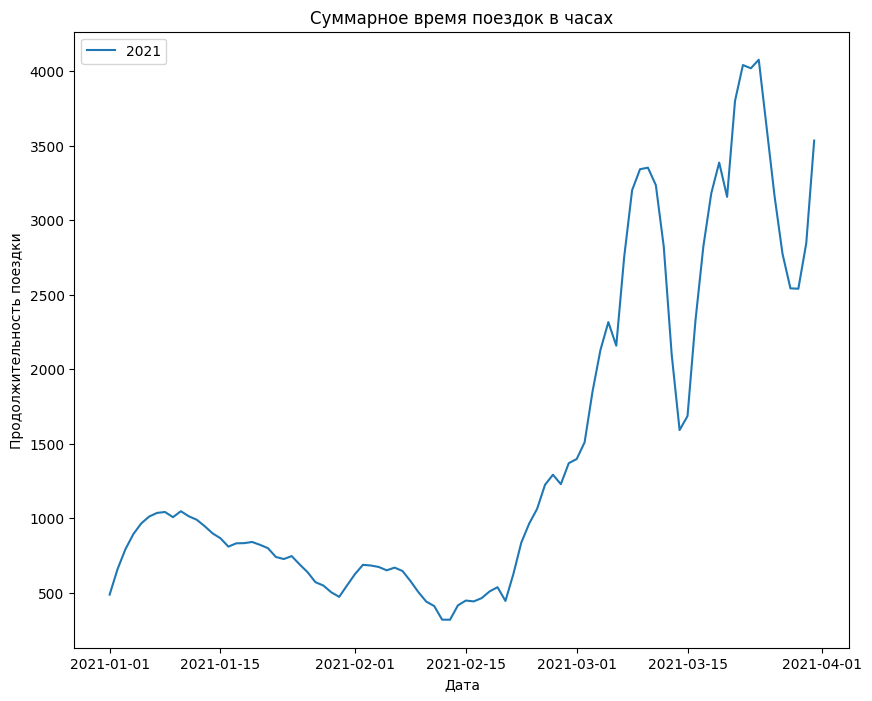

In [46]:
fig, ax = plt.subplots(figsize=(10, 8))  # устанавливаем размер графика
df21.plot(x="started_at", y="tripduration", kind="line", ax=ax, label="2021")
ax.set_xlabel("Дата")  # устанавливаем имя оси x
ax.set_ylabel("Продолжительность поездки")  # устанавливаем имя оси y
ax.set_title("Суммарное время поездок в часах")  # устанавливаем заголовок графика
plt.show()

## Обзор 2022 года

In [98]:
df22 = pd.read_csv("data/2022/Divvy_Trips_2022_full.csv.gz", compression="gzip")

In [99]:
df22.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,C2F7DD78E82EC875,electric_bike,2022-01-13 11:59:47,2022-01-13 12:02:44,Glenwood Ave & Touhy Ave,525,Clark St & Touhy Ave,RP-007,42.012800,-87.665906,42.012560,-87.674367,casual
1,A6CF8980A652D272,electric_bike,2022-01-10 08:41:56,2022-01-10 08:46:17,Glenwood Ave & Touhy Ave,525,Clark St & Touhy Ave,RP-007,42.012763,-87.665967,42.012560,-87.674367,casual
2,BD0F91DFF741C66D,classic_bike,2022-01-25 04:53:40,2022-01-25 04:58:01,Sheffield Ave & Fullerton Ave,TA1306000016,Greenview Ave & Fullerton Ave,TA1307000001,41.925602,-87.653708,41.925330,-87.665800,member
3,CBB80ED419105406,classic_bike,2022-01-04 00:18:04,2022-01-04 00:33:00,Clark St & Bryn Mawr Ave,KA1504000151,Paulina St & Montrose Ave,TA1309000021,41.983593,-87.669154,41.961507,-87.671387,casual
4,DDC963BFDDA51EEA,classic_bike,2022-01-20 01:31:10,2022-01-20 01:37:12,Michigan Ave & Jackson Blvd,TA1309000002,State St & Randolph St,TA1305000029,41.877850,-87.624080,41.884621,-87.627834,member


In [100]:
df22["tripduration"] = pd.to_datetime(df22["ended_at"]) - pd.to_datetime(
    df22["started_at"]
)

In [101]:
df22["tripduration"] = df22["tripduration"].dt.total_seconds()

In [102]:
df22["started_at"] = df22.apply(
    lambda x: date(
        int(x["started_at"].split("-")[0]),
        int(x["started_at"].split("-")[1]),
        int(x["started_at"].split("-")[2][:3]),
    ),
    axis=1,
)

In [103]:
df22 = df22[df22["tripduration"] > 60]
df22 = df22[
    (df22["started_at"] < date(2022, 4, 1)) & (df22["started_at"] > date(2021, 12, 31))
]

In [104]:
df22 = df22.groupby(["started_at"])["tripduration"].sum()
df22 = df22.to_frame()
df22.reset_index(inplace=True)

In [105]:
df22["tripduration"] = savgol_filter(
    df22["tripduration"], window_length=15, polyorder=3
)
df22["tripduration"] = df22["tripduration"].div(3600)

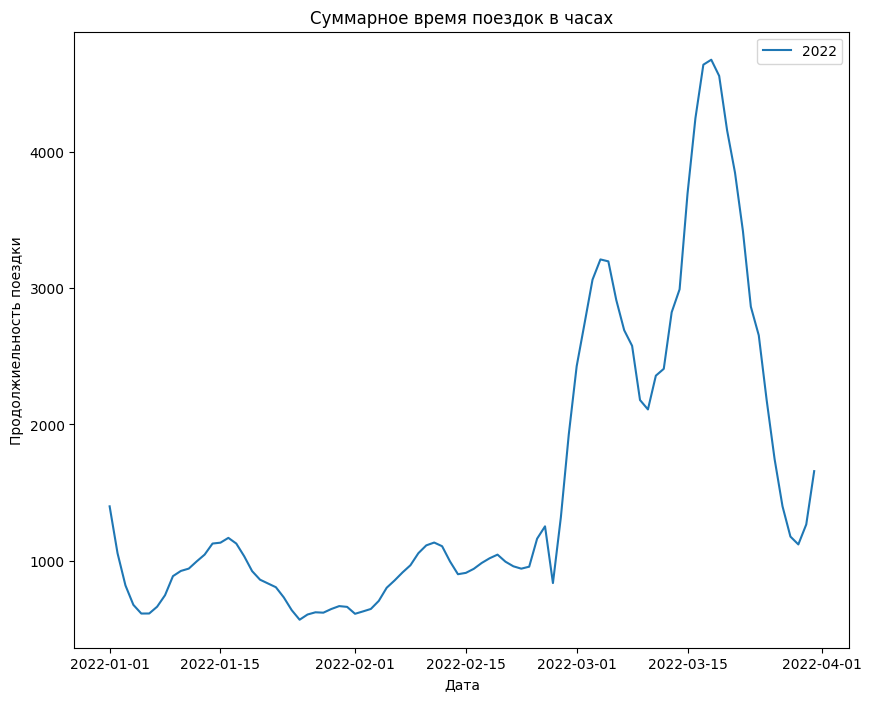

In [106]:
fig, ax = plt.subplots(figsize=(10, 8))  # устанавливаем размер графика
df22.plot(x="started_at", y="tripduration", kind="line", ax=ax, label="2022")
ax.set_xlabel("Дата")  # устанавливаем имя оси x
ax.set_ylabel("Продолжиельность поездки")  # устанавливаем имя оси y
ax.set_title("Суммарное время поездок в часах")  # устанавливаем заголовок графика
plt.show()

## Обзор 2023 года

In [90]:
df23 = pd.read_csv("data/2023/Divvy_Trips_2023_full.csv.gz", compression="gzip")

In [91]:
df23.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,F96D5A74A3E41399,electric_bike,2023-01-21 20:05:42,2023-01-21 20:16:33,Lincoln Ave & Fullerton Ave,TA1309000058,Hampden Ct & Diversey Ave,202480.0,41.924074,-87.646278,41.930000,-87.640000,member
1,13CB7EB698CEDB88,classic_bike,2023-01-10 15:37:36,2023-01-10 15:46:05,Kimbark Ave & 53rd St,TA1309000037,Greenwood Ave & 47th St,TA1308000002,41.799568,-87.594747,41.809835,-87.599383,member
2,BD88A2E670661CE5,electric_bike,2023-01-02 07:51:57,2023-01-02 08:05:11,Western Ave & Lunt Ave,RP-005,Valli Produce - Evanston Plaza,599,42.008571,-87.690483,42.039742,-87.699413,casual
3,C90792D034FED968,classic_bike,2023-01-22 10:52:58,2023-01-22 11:01:44,Kimbark Ave & 53rd St,TA1309000037,Greenwood Ave & 47th St,TA1308000002,41.799568,-87.594747,41.809835,-87.599383,member
4,3397017529188E8A,classic_bike,2023-01-12 13:58:01,2023-01-12 14:13:20,Kimbark Ave & 53rd St,TA1309000037,Greenwood Ave & 47th St,TA1308000002,41.799568,-87.594747,41.809835,-87.599383,member


In [92]:
df23["tripduration"] = pd.to_datetime(df23["ended_at"]) - pd.to_datetime(
    df23["started_at"]
)

In [93]:
df23["tripduration"] = df23["tripduration"].dt.total_seconds()

In [94]:
df23["started_at"] = df23.apply(
    lambda x: date(
        int(x["started_at"].split("-")[0]),
        int(x["started_at"].split("-")[1]),
        int(x["started_at"].split("-")[2][:3]),
    ),
    axis=1,
)

In [95]:
df23 = df23[df23["tripduration"] > 60]
df23 = df23[
    (df23["started_at"] < date(2023, 4, 1)) & (df23["started_at"] > date(2022, 12, 31))
]

In [96]:
df23 = df23.groupby(["started_at"])["tripduration"].sum()
df23 = df23.to_frame()
df23.reset_index(inplace=True)

In [97]:
df23["tripduration"] = savgol_filter(
    df23["tripduration"], window_length=15, polyorder=3
)
df23["tripduration"] = df23["tripduration"].div(3600)

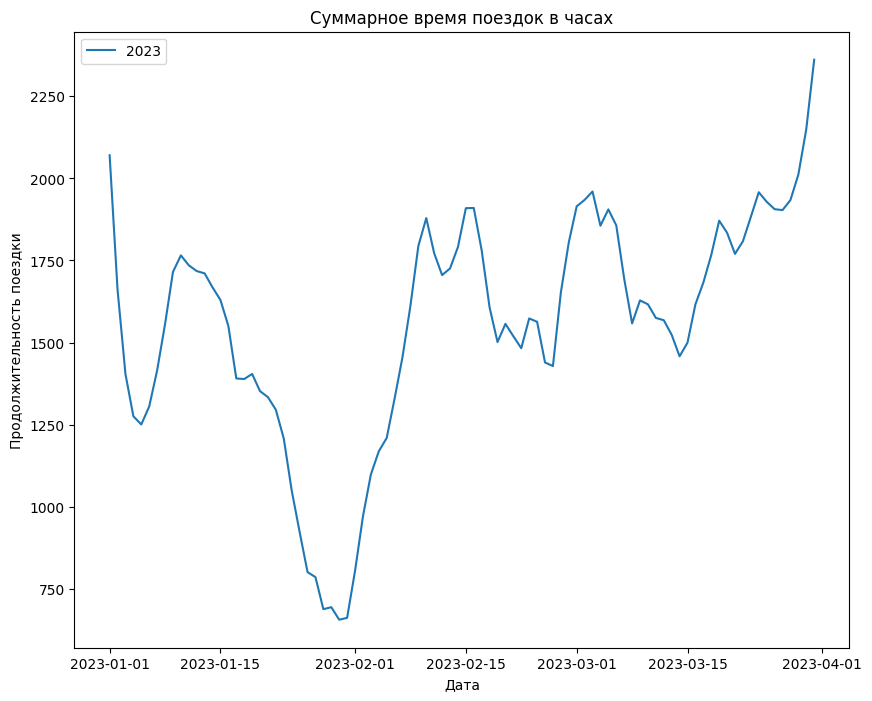

In [59]:
fig, ax = plt.subplots(figsize=(10, 8))  # устанавливаем размер графика
df23.plot(x="started_at", y="tripduration", kind="line", ax=ax, label="2023")
ax.set_xlabel("Дата")  # устанавливаем имя оси x
ax.set_ylabel("Продолжительность поездки")  # устанавливаем имя оси y
ax.set_title("Суммарное время поездок в часах")  # устанавливаем заголовок графика
plt.show()

# Сравним 2023 с прошлыми годами

In [ ]:
df23["started_at"] = pd.to_datetime(df23["started_at"]).dt.strftime('%m-%d')

df22["started_at"] = pd.to_datetime(df22["started_at"]).dt.strftime('%m-%d')

df["starttime"] = pd.to_datetime(df["starttime"]).dt.strftime('%m-%d')

df17["starttime"] = pd.to_datetime(df17["start_time"]).dt.strftime('%m-%d')

Text(0, 0.5, 'Продолжительность поездки (в часах)')

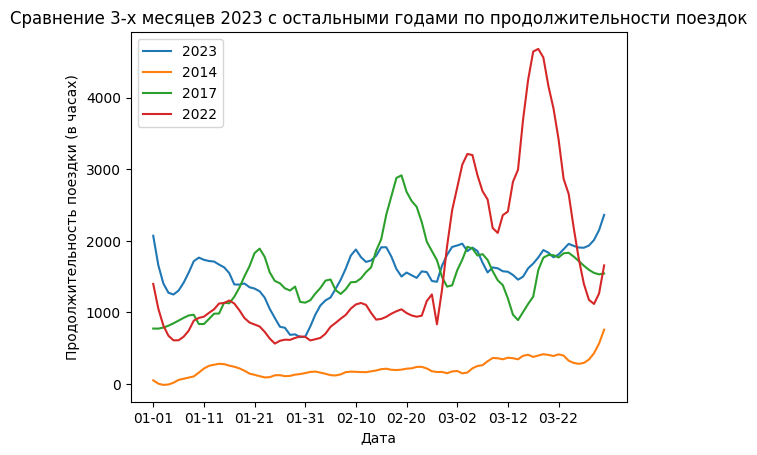

In [111]:
plt.plot(df23["started_at"], df23["tripduration"], label=2023)
plt.plot(df["starttime"], df["tripduration"], label=2014)
plt.plot(df17["starttime"], df17["tripduration"], label=2017)
plt.plot(df22["started_at"], df22["tripduration"], label=2022)
plt.xticks(df17["starttime"][::10])
plt.legend()
plt.title("Сравнение 3-х месяцев 2023 с остальными годами по продолжительности поездок")
plt.xlabel("Дата")
plt.ylabel("Продолжительность поездки (в часах)")

Text(0, 0.5, 'Продолжительность поездки (в часах)')

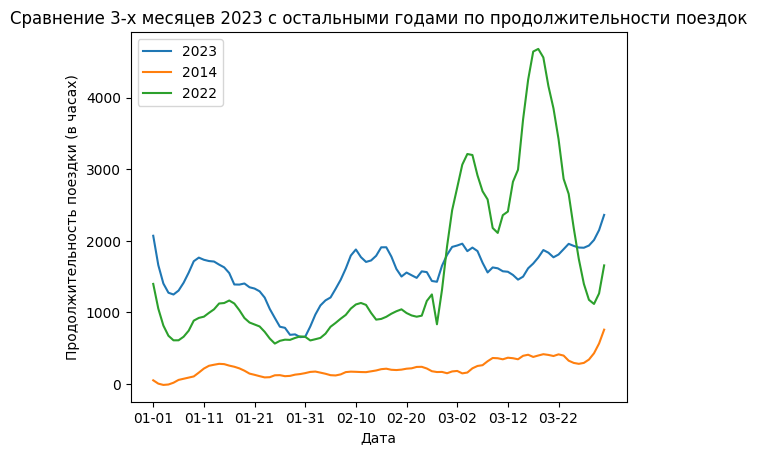

In [112]:
plt.plot(df23["started_at"], df23["tripduration"], label=2023)
plt.plot(df["starttime"], df["tripduration"], label=2014)
plt.plot(df22["started_at"], df22["tripduration"], label=2022)
plt.xticks(df17["starttime"][::10])
plt.legend()
plt.title("Сравнение 3-х месяцев 2023 с остальными годами по продолжительности поездок")
plt.xlabel("Дата")
plt.ylabel("Продолжительность поездки (в часах)")